/var/folders/9w/yxckzq5x6sz9_lwzrpv2tg_h0000gp/T/ipykernel_52877/4236886240.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tge['Total GHG Emissions'] = df_tge.iloc[:, 2:].sum(axis=1)
/var/folders/9w/yxckzq5x6sz9_lwzrpv2tg_h0000gp/T/ipykernel_52877/4236886240.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_met['Total Methane Emissions'] = df_met.iloc[:, 2:].sum(axis=1)


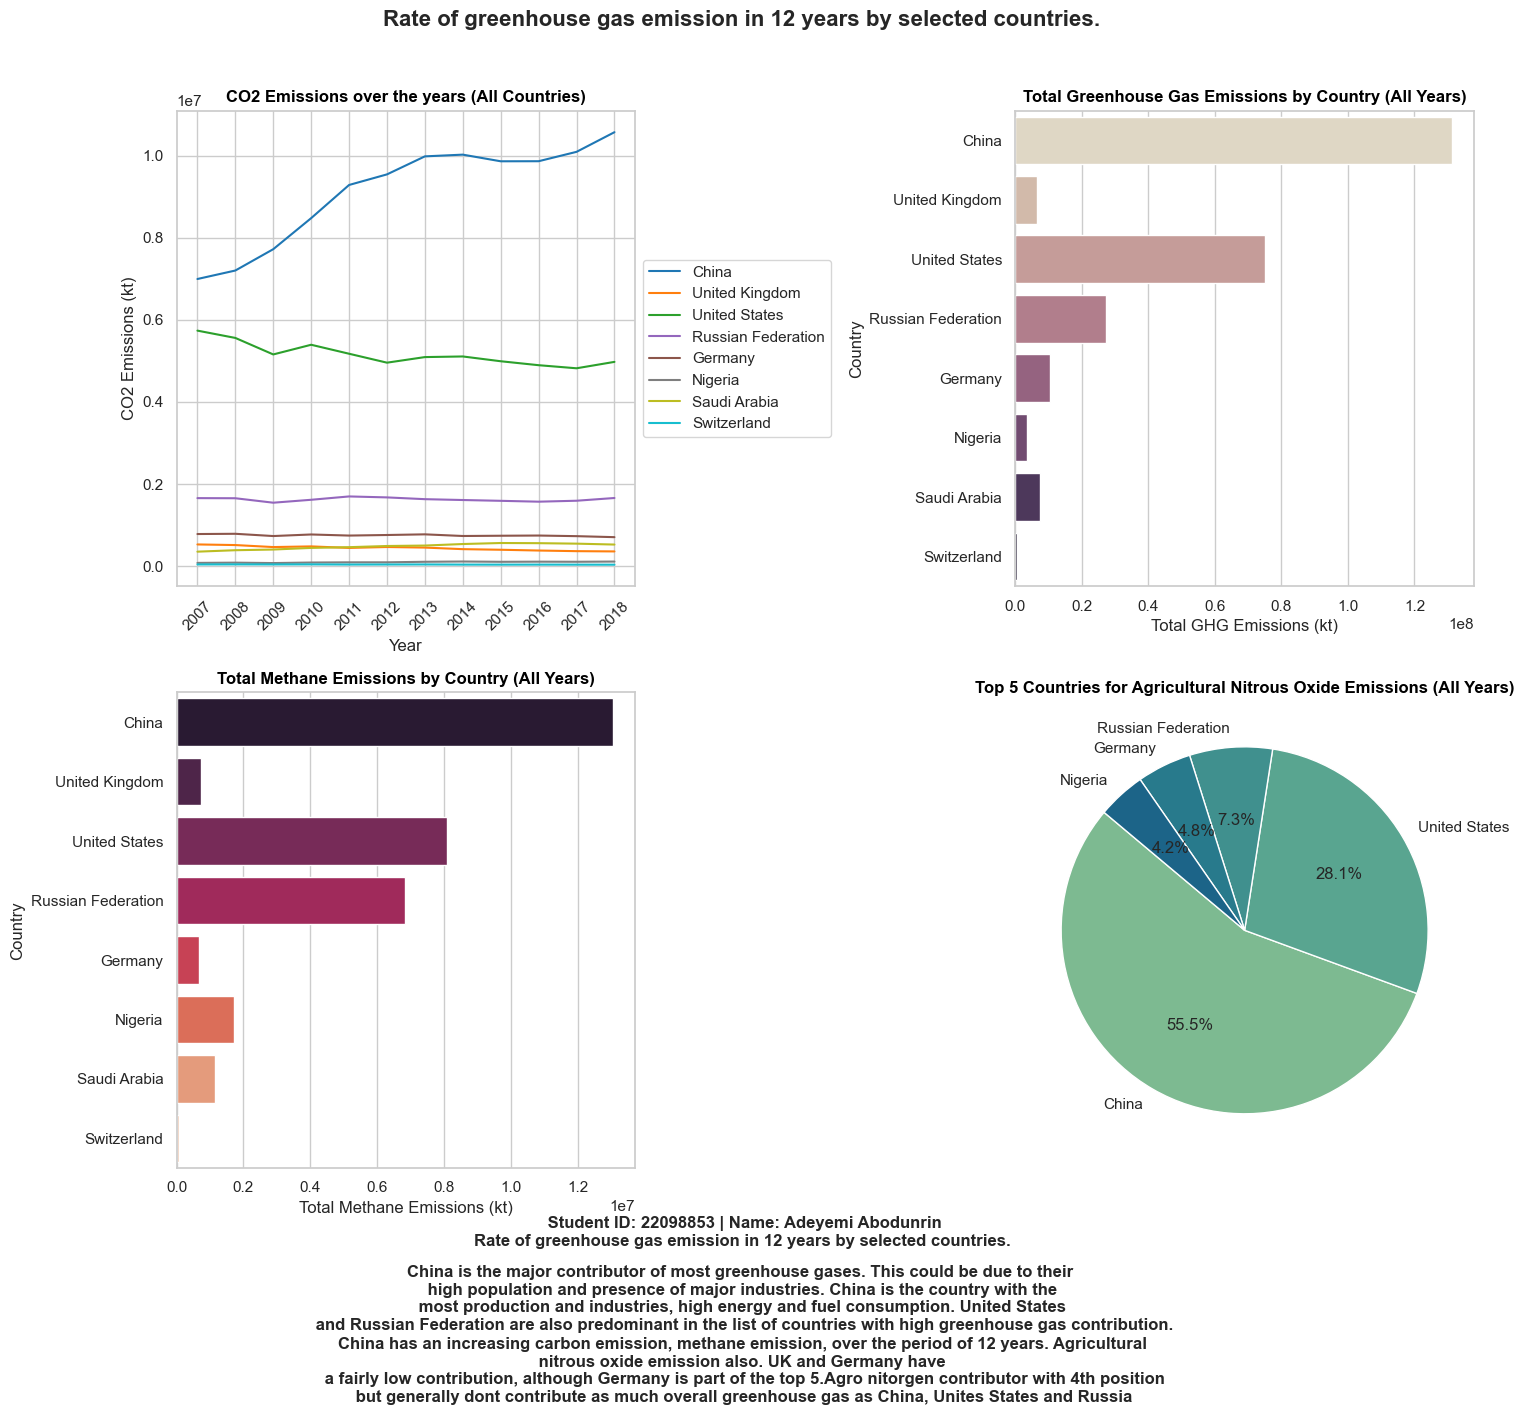

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read the csv_file
df_ind = pd.read_csv("infograph_Data.csv")

# Drop columns ("Country Code" and "Series Code") from the dataframe
df_ind = df_ind.drop(columns=["Country Code", "Series Code"])

# check for NAN values
df_ind.isna().sum()

# Filter the DataFrame to extract rows and make
# 'Series Name' the 'CO2 emissions (kt)'
df_co = df_ind[df_ind.loc[:, "Series Name"] == "CO2 emissions (kt)"]

# Filter the DataFrame to extract rows and make
# 'Series Name' the 'Methane emissions (kt of CO2 equivalent)'
df_met = df_ind[df_ind.loc[:, "Series Name"] ==
                "Methane emissions (kt of CO2 equivalent)"]

# Filter the DataFrame to extract rows and make
# 'Series Name' the 'Total greenhouse gas emissions (kt of CO2 equivalent)'
df_tge = df_ind[df_ind.loc[:, "Series Name"] ==
                "Total greenhouse gas emissions (kt of CO2 equivalent)"]

# Filter the DataFrame to extract rows and make
# 'Series Name' the 'Agricultural nitrous oxide emissions
# (thousand metric tons of CO2 equivalent)'
df_agrno = df_ind[df_ind.loc[:, "Series Name"] ==
                  "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]

# Set up the figure and subplots 2x2 grid format
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

#  CO2 Emissions over the years
num_countries = len(df_co['Country Name'])
color_map = plt.get_cmap('tab10')
colors = color_map(np.linspace(0, 1, num_countries))

for i, country in enumerate(df_co['Country Name']):
    axs[0, 0].plot(df_co.columns[2:], df_co.iloc[i, 2:], linestyle='-',
                   color=colors[i], label=country)
# plot1
axs[0, 0].set_title('CO2 Emissions over the years (All Countries)',fontweight='bold', color='black')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CO2 Emissions (kt)')
axs[0, 0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0, 0].tick_params(axis='x', rotation=45)

# plot 2:Total Greenhouse Gas Emissions by Country for all years
df_tge['Total GHG Emissions'] = df_tge.iloc[:, 2:].sum(axis=1)
sns.barplot(x='Total GHG Emissions', y='Country Name', data=df_tge, orient='h',
            ax=axs[0, 1], palette='ch:s=-.2,r=.6')
axs[0, 1].set_title('Total Greenhouse Gas Emissions by Country (All Years)',fontweight='bold', color='black')
axs[0, 1].set_xlabel('Total GHG Emissions (kt)')
axs[0, 1].set_ylabel('Country')

# Plot 3:  Methane Emissions by Country for all years
df_met['Total Methane Emissions'] = df_met.iloc[:, 2:].sum(axis=1)
sns.barplot(x='Total Methane Emissions', y='Country Name', data=df_met,
            orient='h', ax=axs[1, 0], palette='rocket')
axs[1, 0].set_title('Total Methane Emissions by Country (All Years)',fontweight='bold', color='black')
axs[1, 0].set_xlabel('Total Methane Emissions (kt)')
axs[1, 0].set_ylabel('Country')

# plot 4: top 5 Agricultural Nitrous Oxide Emissions
years = df_agrno.columns[2:]
country_total = {}

for year in years:
    data_year = df_agrno[['Country Name', year]]
    for index, row in data_year.iterrows():
        country = row['Country Name']
        emissions = row[year]
        if country not in country_total:
            country_total[country] = 0
        country_total[country] += emissions

top5_countries = sorted(country_total.items(), key=lambda x: x[1],
                        reverse=True)[:5]
top5_country_names = [country[0] for country in top5_countries]
top5_country_emissions = [country[1] for country in top5_countries]

axs[1, 1].pie(top5_country_emissions, labels=top5_country_names,
              autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Top 5 Countries for Agricultural Nitrous Oxide Emissions (All Years)',fontweight='bold', color='black')

sns.set(style='whitegrid')
sns.set_palette('crest')

# Add subplot title
fig.suptitle('Rate of greenhouse gas emission in 12 years by selected countries.',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()

# Add text annotations
text_1 = ' Student ID: 22098853 | Name: Adeyemi Abodunrin\nRate of greenhouse gas emission in 12 years by selected countries.'
plt.text(.5, -0.01, text_1, transform=fig.transFigure,
         ha='center', fontsize=12, fontweight='bold')

text_2 = 'China is the major contributor of most greenhouse gases. '
text_2 += 'This could be due to their \n high population and presence of major industries. '
text_2 += 'China is the country with the \n most production and industries, high energy and fuel consumption. '
text_2 += 'United States \n and Russian Federation are also predominant in the list of countries with high greenhouse gas contribution.'
plt.text(.5, -0.08, text_2, transform=fig.transFigure,
         ha='center', fontsize=12, fontweight='bold')

text_3 = 'China has an increasing carbon emission, methane emission, over the period of 12 years. '
text_3 += 'Agricultural\n nitrous oxide emission also. UK and Germany have \n a fairly low contribution, '
text_3 += 'although Germany is part of the top 5.Agro nitorgen contributor with 4th position\n but generally '
text_3 += 'dont contribute as much overall greenhouse gas as China, Unites States and Russia'
plt.text(.5, -0.14, text_3, transform=fig.transFigure,
         ha='center', fontsize=12, fontweight='bold')

plt.show()